In [284]:
import pandas as pd
import string
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import time
from PIL import Image
from IPython.display import display

# Prepocessing

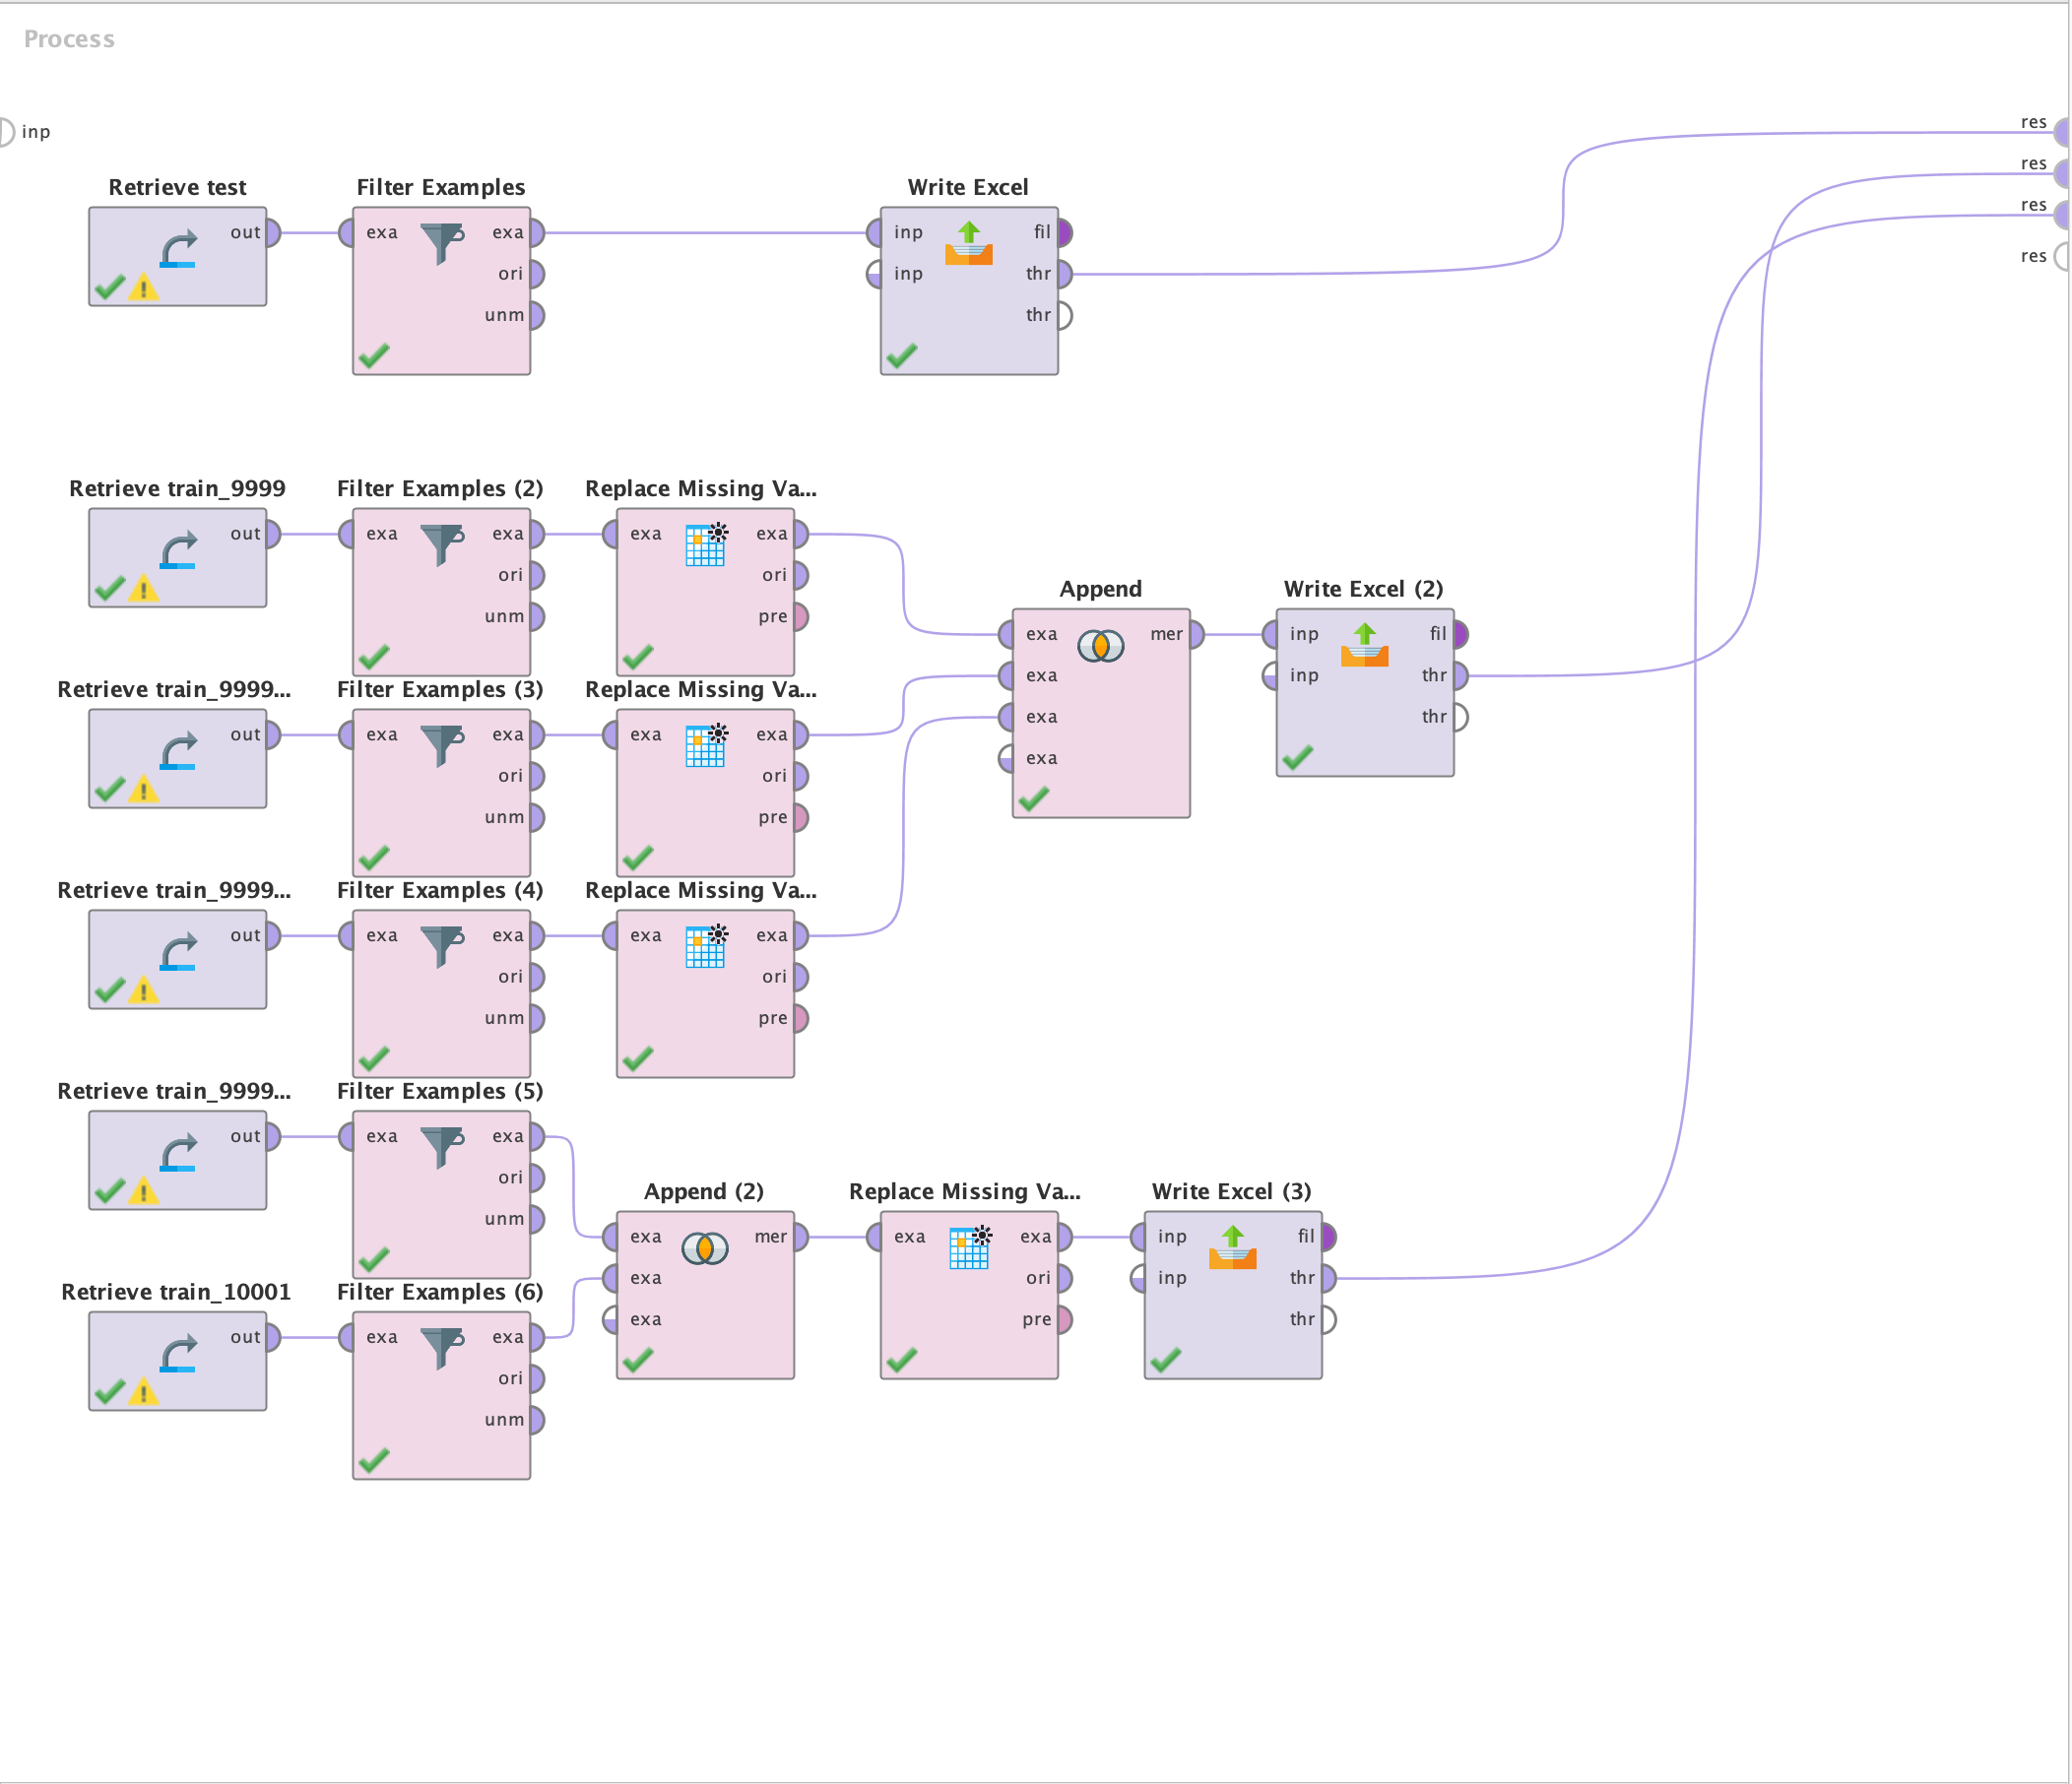

In [285]:
# RapidMiner
# ตัดข้อมูลที่ไม่มี Label ออกจากทั้ง Train/Test set
# แยกข้อมูลตามคลาสแล้ว Replace Missing Value ด้วยค่า Mean ตามคลาสนั้น ๆ 
img = Image.open('image.png')
display(img)

In [286]:
train_012 = pd.read_excel('train_0_1_2_f.xlsx')
train_3 = pd.read_excel('train_3_f.xlsx')
ALLF_train_df = x_012.append(x_3)

test_df = pd.read_excel('test_f.xlsx')
F_TEST_DF = pd.read_excel('test_f.xlsx')

train_df.rename(columns={"class":"target"},inplace = True)
train_3.rename(columns={"class":"target"},inplace = True)
test_df.rename(columns={"class":"target"},inplace = True)
ALLF_train_df.rename(columns={"class":"target"},inplace = True)

train_0 = train_df[train_df['target'] == 0]
train_1 = train_df[train_df['target'] == 1]
train_2 = train_df[train_df['target'] == 2]


#train_df
ALLF_train_df

/Users/lapislux/opt/anaconda3/envs/tf/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lapislux/opt/anaconda3/envs/tf/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_23019/1648258061.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ALLF_train_df = x_012.append(x_3)
/Users/lapislux/opt/anaconda3/envs/tf/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/l

,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,X,Y,Z,target
0,-0.089860,1.255433,-1.370917,1.134030,-2.047994,0.005378,0.369579,0.339629,3.066222,1.721125,...,0.767633,-0.000409,0.000200,2.112873,1.173933,2.126295,0.134627,-0.002042,1.892718,0
1,0.484025,-0.453402,-0.852625,1.135974,-2.047197,5.009623,4.706558,1.194902,-0.001191,0.226744,...,-0.299639,0.000155,0.001302,2.016513,0.639301,1.244560,-0.300958,1.059281,2.356757,0
2,0.271791,-1.750620,0.603803,1.131322,-2.050287,9.985754,10.034690,-1.551100,1.287744,-0.565950,...,0.071542,0.001489,0.893986,2.059502,0.754935,1.899100,0.170648,-3.478158,3.824294,0
3,0.113975,-0.501497,0.532993,0.001696,-2.042851,-0.000963,-0.144248,2.098725,0.002866,0.254219,...,0.303082,0.000749,1.783299,2.008047,0.931271,2.135290,-0.121917,1.568700,1.937875,0
4,0.202354,-0.229574,0.047223,0.000124,-2.047201,-0.002133,0.005878,-1.430843,-0.002406,-0.240381,...,-0.383070,-0.000235,0.447474,2.049105,0.160752,2.762996,-0.156155,-0.459301,0.978032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.353361,-1.340513,-0.658622,0.001424,-0.000183,0.001481,-0.279436,0.531241,1.019735,0.574242,...,1.097695,0.000017,0.001081,-0.007428,0.019949,0.082497,-0.192040,1.565171,-0.329285,3
1870,-0.052472,0.010153,0.932390,0.565722,-2.041744,0.001285,0.461178,1.485316,1.024863,0.142522,...,0.281631,0.001965,0.446143,2.018628,0.791388,1.378467,-0.019633,0.023776,2.599539,3
1871,-0.008446,-0.080470,-0.746756,1.133614,-1.024402,-0.012047,0.483766,0.620497,-0.003507,1.398735,...,0.929043,-0.000466,-0.001067,0.971468,0.953080,1.339667,-0.009890,-1.008383,0.595342,3
1872,-0.069555,1.308103,0.447967,-0.001534,-1.020662,-0.004202,0.131857,-0.063463,2.041146,1.576496,...,0.966546,0.001118,0.001360,1.024616,-0.705847,0.401222,0.002893,1.083615,2.034834,3


### Outlier

<Axes: >

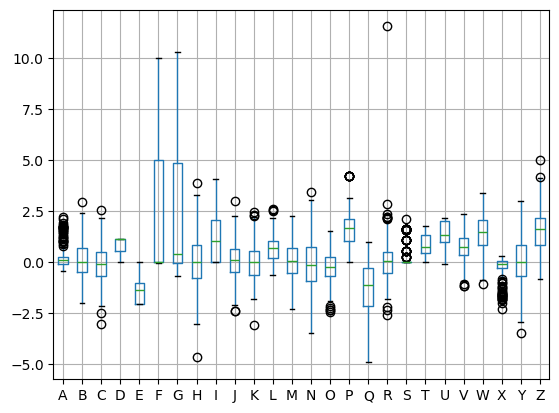

In [287]:
uppercase_alphabet = string.ascii_uppercase
alphabet = []
for i in uppercase_alphabet:
    alphabet.append(i)

train_0.boxplot(column = alphabet )

<Axes: >

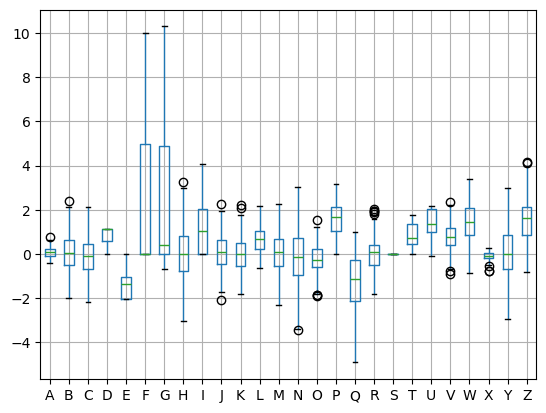

In [288]:
for i in alphabet:
    Q1 = train_0[i].quantile(0.25)
    Q3 = train_0[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = train_0[(train_0[i] < Q1 - threshold * IQR) | (train_0[i] > Q3 + threshold * IQR)]
    for j in outliers.index:
        train_0.at[j,i] = train_0[i].median()
train_0.boxplot(column = alphabet)

In [289]:
dfr = [train_1,train_2,train_3]
for d in dfr :
    for i in alphabet:
        Q1 = d[i].quantile(0.25)
        Q3 = d[i].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        outliers = d[(d[i] < Q1 - threshold * IQR) | (d[i] > Q3 + threshold * IQR)]
        for j in outliers.index:
            d.at[j,i] = d[i].median()

In [290]:
All_train = train_0.append(train_1,ignore_index=True)
All_train = All_train.append(train_2,ignore_index=True)
All_train = All_train.append(train_3,ignore_index=True)
All_train

/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_23019/1364780924.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_train = train_0.append(train_1,ignore_index=True)
/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_23019/1364780924.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_train = All_train.append(train_2,ignore_index=True)
/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_23019/1364780924.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_train = All_train.append(train_3,ignore_index=True)


,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,X,Y,Z,target
0,-0.089860,1.255433,-1.370917,1.134030,-2.047994,0.005378,0.369579,0.339629,3.066222,1.721125,...,0.767633,-0.000409,0.000200,2.112873,1.173933,2.126295,0.134627,-0.002042,1.892718,0
1,0.484025,-0.453402,-0.852625,1.135974,-2.047197,5.009623,4.706558,1.194902,-0.001191,0.226744,...,-0.299639,0.000155,0.001302,2.016513,0.639301,1.244560,-0.300958,1.059281,2.356757,0
2,0.271791,-1.750620,0.603803,1.131322,-2.050287,9.985754,10.034690,-1.551100,1.287744,-0.565950,...,0.071542,0.001489,0.893986,2.059502,0.754935,1.899100,0.170648,-0.002042,3.824294,0
3,0.113975,-0.501497,0.532993,0.001696,-2.042851,-0.000963,-0.144248,2.098725,0.002866,0.254219,...,0.303082,0.000749,1.783299,2.008047,0.931271,2.135290,-0.121917,1.568700,1.937875,0
4,0.202354,-0.229574,0.047223,0.000124,-2.047201,-0.002133,0.005878,-1.430843,-0.002406,-0.240381,...,-0.383070,-0.000235,0.447474,2.049105,0.160752,2.762996,-0.156155,-0.459301,0.978032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,0.353361,-1.340513,-0.658622,0.001424,-0.000183,0.001481,-0.279436,0.531241,1.019735,0.574242,...,1.097695,0.000017,0.001081,-0.007428,0.019949,0.082497,-0.192040,1.565171,-0.329285,3
11196,-0.052472,0.010153,0.932390,0.565722,-2.041744,0.001285,0.461178,1.485316,1.024863,0.142522,...,0.281631,0.001965,0.446143,2.018628,0.791388,1.378467,-0.019633,0.023776,2.599539,3
11197,-0.008446,-0.080470,-0.746756,1.133614,-1.024402,-0.012047,0.483766,0.620497,-0.003507,1.398735,...,0.929043,-0.000466,-0.001067,0.971468,0.953080,1.339667,-0.009890,-1.008383,0.595342,3
11198,-0.069555,1.308103,0.447967,-0.001534,-1.020662,-0.004202,0.131857,-0.063463,2.041146,1.576496,...,0.966546,0.001118,0.001360,1.024616,-0.705847,0.401222,0.002893,1.083615,2.034834,3


### Imbalance

Class=0, n=185 (1.652%)
Class=1, n=2409 (21.509%)
Class=2, n=6732 (60.107%)
Class=3, n=1874 (16.732%)


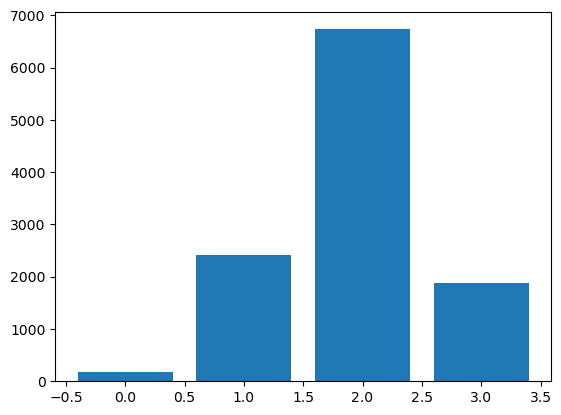

In [293]:
# load and summarize the dataset
from collections import Counter
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# split into input and output elements
x = All_train.iloc[:, 0:-1]
y = All_train.iloc[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=6732 (25.000%)
Class=1, n=6732 (25.000%)
Class=2, n=6732 (25.000%)
Class=3, n=6732 (25.000%)


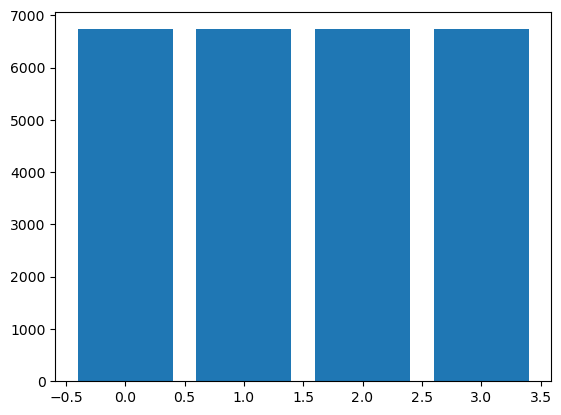

In [294]:
# example of oversampling a multi-class classification dataset
from imblearn.under_sampling import RandomUnderSampler
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
#x = All_train.iloc[:, 0:-1]
#y = All_train.iloc[:, -1]
# label encode the target variable

#rus = RandomUnderSampler(random_state=42)

x = All_train.iloc[:, 0:-1]
y = All_train.iloc[:, -1]


y = LabelEncoder().fit_transform(y)
strategy = {0:6732, 1:6732, 2:6732, 3:6732}
oversample = SMOTE(sampling_strategy=strategy)

#oversample = RandomUnderSampler(random_state=42)
x, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=1621 (14.473%)
Class=3, n=1722 (15.375%)
Class=1, n=1717 (15.330%)
Class=0, n=1672 (14.929%)


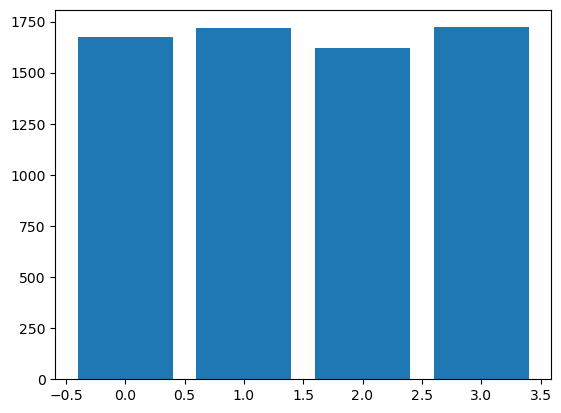

In [274]:
counter = Counter(y_valid)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [388]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#normalized_x = pd.DataFrame(x_scaled)
#normalized_x

### Feture Selection

In [223]:
dfr = [train_0,train_1,train_2,train_3,ALLF_train_df]
dfr_str = ['train_1','train_1','train_2','train_3','ALLF_train_df']
dfr_F = []
for df in dfr:
    rfe_selector = RFE(estimator=XGBClassifier(),
                       n_features_to_select=10,
                       step=1, 
                       importance_getter='auto')
    rfe_selector.fit(x, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = x.loc[:,rfe_support].columns.tolist()
    dfr_F.append(rfe_feature)
    
    
for i in range (len(dfr_str)):
    print(dfr_str[i]+' : '+ str(dfr_F[i]))
#    feture_select = []
#    for i in range(len(rfe_selector.ranking_)):
#        if rfe_selector.ranking_[i] == 1:
#            feture_select.append(feture_name[i])
#print(feture_select)

train_1 : ['D', 'E', 'F', 'G', 'I', 'J', 'P', 'S', 'T', 'U']
train_1 : ['D', 'E', 'F', 'G', 'I', 'J', 'P', 'S', 'T', 'U']
train_2 : ['D', 'E', 'F', 'G', 'I', 'J', 'P', 'S', 'T', 'U']
train_3 : ['D', 'E', 'F', 'G', 'I', 'J', 'P', 'S', 'T', 'U']
ALLF_train_df : ['D', 'E', 'F', 'G', 'I', 'J', 'P', 'S', 'T', 'U']


In [390]:
x = x[feture_select]
x

,A,C,D,E,I,J,L,M,N,O,P,Q,R,S,T,U,V,W,X,Z
0,-0.089860,-1.370917,1.134030,-2.047994,3.066222,1.721125,-0.258843,0.741592,1.699110,-0.252328,1.655260,-1.282240,0.767633,-0.000409,0.000200,2.112873,1.173933,2.126295,0.134627,1.892718
1,0.484025,-0.852625,1.135974,-2.047197,-0.001191,0.226744,0.202309,1.552914,2.142868,-0.230111,2.109547,0.094257,-0.299639,0.000155,0.001302,2.016513,0.639301,1.244560,-0.300958,2.356757
2,0.271791,0.603803,1.131322,-2.050287,1.287744,-0.565950,0.775315,-2.268328,-2.984725,0.101508,3.162638,-4.847788,0.071542,0.001489,0.893986,2.059502,0.754935,1.899100,0.170648,3.824294
3,0.113975,0.532993,0.001696,-2.042851,0.002866,0.254219,1.738579,1.333545,1.175482,0.706809,2.109748,-0.484041,0.303082,0.000749,1.783299,2.008047,0.931271,2.135290,-0.121917,1.937875
4,0.202354,0.047223,0.000124,-2.047201,-0.002406,-0.240381,0.256358,-0.842724,0.492599,-0.626099,-0.005065,0.101798,-0.383070,-0.000235,0.447474,2.049105,0.160752,2.762996,-0.156155,0.978032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,-0.000623,-0.248761,1.135239,-1.445793,0.601737,1.029077,0.230169,-0.588601,-1.005688,0.155389,1.054844,-0.220774,-0.079731,0.107988,0.841729,1.447736,0.906619,1.639568,-0.000688,1.129642
26924,0.092396,0.690120,1.134912,-1.297560,-0.000140,-1.653904,0.839927,-0.120376,-1.389955,-0.129521,1.050424,-0.198798,0.070652,0.207527,0.095216,0.177421,0.687818,1.250866,-0.051165,0.926179
26925,0.054953,-0.113792,1.133511,-0.806572,3.065256,-0.411138,1.509947,-0.314071,0.419550,-0.828479,1.494144,-2.937698,0.034300,-0.000746,1.337260,0.770424,0.830977,0.653406,-0.038700,1.323621
26926,-0.040514,-1.525352,-0.001834,0.003472,1.020100,-0.253767,-0.382887,1.227025,0.091980,-0.907229,0.898837,-1.151159,-0.169177,0.000561,0.000292,-0.038963,0.044567,-0.174442,0.002906,1.003485


# Model : Parameter Selection

In [387]:
from sklearn.model_selection import GridSearchCV
time_start = time.time()
#----- XGBClassifier -----
xgboost = XGBClassifier(objective = 'multi:softmax',min_child_weight=1,gamma = 0,n_estimators=1000)
xgboost_params = {
    'learning_rate' : np.arange(0.1, 1 ,0.1),
    'max_depth': np.arange(1,10,1), 
    'subsample': np.arange(0.1,1,0.1),
    'colsample_bytree':np.arange(0.1,1,0.1),
    'nthread':np.arange(2,10,1), 
}
xgboost_grid = GridSearchCV(estimator=xgboost, param_grid=xgboost_params)
xgboost_grid.fit(x_train, y_train)

print('xgboost Best Score:', xgboost_grid.best_score_)
print('xgboost Best Params:', xgboost_grid.best_params_)
print()
#---------------------------------------

time_end = time.time()
print(f'Total Time: {time_end - time_start} - Second')

xgboost Best Score: 0.8469994901198463
xgboost Best Params: {'colsample_bytree': 0.9, 'learning_rate': 0.9, 'max_depth': 9, 'nthread': 3, 'subsample': 0.9}

Total Time: 228.05274486541748 - Second


# Model Train and Evaluation

In [384]:
x_test = test_df[feture_select].iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]

xgboost = XGBClassifier(nthread = 3,
                        colsample_bytree=0.9,
                        subsample =0.9, 
                        max_depth = 9 ,
                        learning_rate = 0.01,
                        objective = 'multi:softmax',
                        min_child_weight=1,
                        gamma = 0,
                        n_estimators=1000)
xgboost.fit(x,y)
#xgboost.score(x_valid,y_valid)
test_pred = xgboost.predict(x_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.66      0.61      0.63       475
           2       0.70      0.89      0.78      1186
           3       0.00      0.00      0.00       299

    accuracy                           0.67      2000
   macro avg       0.34      0.37      0.35      2000
weighted avg       0.57      0.67      0.61      2000

